<a href="https://colab.research.google.com/github/Tanushreea05/Neural-Network-Regression-Model/blob/main/DL_EXP01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset1 = pd.read_csv('/content/dataset - Sheet1.csv')




In [4]:
X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [8]:
# Name:Tanushree A
# Register Number:212223100057
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,8)
        self.fc2 = nn.Linear(8,16)
        self.fc3 = nn.Linear(16,1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [9]:
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(ai_brain.parameters(), lr=0.001)

In [10]:
def train_model(ai_brain, criterion, optimizer, X_train_tensor, y_train_tensor, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        # Pass X_train_tensor instead of X_train to ai_brain
        loss = criterion(ai_brain(X_train_tensor), y_train_tensor)
        loss.backward()
        optimizer.step()
        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.6f}')

In [11]:
train_model(ai_brain, criterion, optimizer, X_train_tensor, y_train_tensor)

Epoch 0, Loss: 12850.680664
Epoch 200, Loss: 11621.288086
Epoch 400, Loss: 5500.737793
Epoch 600, Loss: 1467.558105
Epoch 800, Loss: 1114.172974
Epoch 1000, Loss: 912.405212
Epoch 1200, Loss: 711.953857
Epoch 1400, Loss: 519.664734
Epoch 1600, Loss: 345.709900
Epoch 1800, Loss: 202.546127


In [12]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 138.441254


In [13]:

loss_df = pd.DataFrame(ai_brain.history)

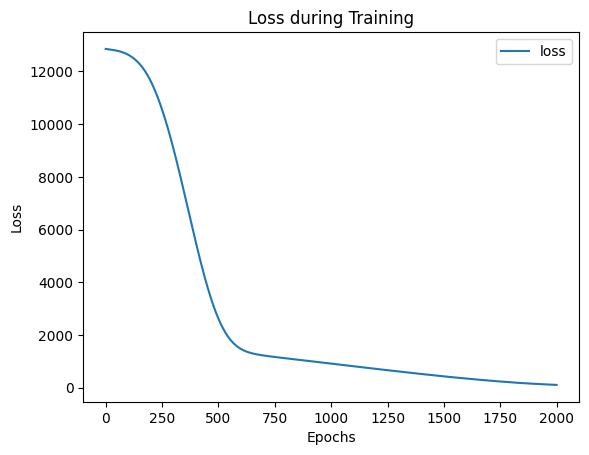

In [14]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()


In [17]:
X_n1_1 = torch.tensor([[8]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 86.26386260986328


In [18]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 94.47549438476562
